In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


In [2]:
df = pd.read_csv("hw1_dataset.csv")
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 600)

In [3]:

#remove th SddssS, SsBr, SaasN, SssS because of 0.0000000s
#remove NaN  in MW2
#remove SMR_VSA2
#clean MIF
#Possible Outliers: n9FaRing, SsssCH, nAcid , SMR_VSA2




In [4]:
df.loc[df["MIF"] == "Computation failed", "MIF"] = 0
df.loc[df["SMIF"] == "big", "SMIF"] = 0
df.loc[df["SMIF"] == "bigger", "SMIF"] = 1
df.loc[df["SMIF"] == "the_biggest", "SMIF"] = 2
df["MW2"] = df["MW2"].fillna(df["MW2"].median())
df.head(5)

,experimental_proprty,MS_enc,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,nFAHRing,SlogP_VSA6,AATS3d,ATSC6are,nHBDon,SddssS,ATS6m,nAcid,PEOE_VSA8,SsssCH,ATSC5dv,MPC9,SsBr,MPC4,AATS5v,ZMIC1,C2SP2,ATSC8v,MW2,MIC5,SMR_VSA2,nBondsA,Xp-7d,ATS8Z,nBondsKD,ATS1dv,SaasN,PEOE_VSA6,LabuteASA,AATS5pe,ATS3pe,n9FaRing,SssS,ATS0se,MPC7,AATSC5m,EState_VSA6,SRW04,SRW03,AATS5i,n5HRing,NaaN,AATS1Z,Sse,ATSC3d,AATS5d,VSA_EState1,IC2,SRW10,Xp-3dv,AATS5Z,ATS7pe,ATSC6pe,Xpc-5dv,bpol,ATSC0d,n10FaHRing,CIC1,ATSC1i,AATSC0dv,ATS4pe,ATS0are,nBondsS,ATSC6Z,ATS0v,ATS2d,ATS8pe,nF,ATS5i,ATS4m,ATS1se,MWC07,EState_VSA2,ATSC4d,ATSC3i,ATSC4p,Xp-6d,piPC5,ATS1are,AATS4m,IC4,NaaNH,WPol,MIF,NsCl,ATS0m,ATSC1pe,VSA_EState9,SdNH,AATSC0Z,ATS0pe,AATSC5Z,nBondsKS,SMR_VSA9,ATS3m,nBonds,ATSC8dv,MIF4,VSA_EState4,PEOE_VSA13,Xp-3d,ATS2se,SlogP_VSA10,ATSC6v,ATSC2i,ATS2are,n6aRing,AATS2Z,PEOE_VSA11,MWC03,AATSC3m,nFRing,TIC3,nO,ATSC7pe,ATS4v,AATSC1v,SRW05,EState_VSA8,Xpc-5d,NssssC,Sv,SRW06,ATSC4m,AATSC5dv,C1SP3,ATS8m,ATSC4Z,Sp,SdO,nHRing,ABCGG,NtsC,ATS1m,EState_VSA9,AATSC5v,nH,ATS7m,IC3,ATSC5se,ATS4d,AATSC4m,TIC5,ATS1p,MPC6,SlogP_VSA11,Diameter,GGI1,Xp-0dv,AATS2i,VMcGowan,ATSC3v,AATS0m,ATS1pe,ATS7are,ATS0Z,EState_VSA4,NaaaC,MWC05,n10FHRing,ATSC7p,AATS3Z,ATSC7se,TIC0,CIC2,ATSC0pe,VSA_EState5,SssO,ATS7dv,SaaO,SRW07,ATS5m,ATSC2Z,ATSC4dv,n9FHRing,AATSC4dv,n5aRing,SlogP_VSA1,MIF6,VSA_EState3,Xp-2dv,MIC4,Xp-4dv,fragCpx,TSRW10,GGI2,SRW08,SMIF,piPC9,NssCH2,SZ,ATS7i,Si,ATSC4are,Zagreb1,ATSC3pe,SsssN,ATS2Z,NssNH,ATS2pe,ATS5v,AATS1m,ZMIC4,ATSC0p,AATS4d,ATS5pe,ATSC5v,PEOE_VSA5,AATS3m,mZagreb2,AATSC1m,n5Ring,ATSC1m,MIC1,ATSC8m,SMR_VSA4,AATSC2Z,n10FaRing,ATSC3Z,SdssC,SlogP_VSA7,EState_VSA1,AATS4i,SRW09,ATSC4i,ATSC1Z,Xpc-6d,AATS3i,ATS3v,VSA_EState8,ATS8se,ATSC2p,EState_VSA3,GGI4,ATSC1dv,ATS3se,ATSC8p,ATS8v,AATSC4v,ATSC6dv,ATSC5Z,SssNH,MWC06,nHeavyAtom,ATS6are,ATS3p,ECIndex,Xp-5d,MWC10,StsC,AATSC1Z,SMR_VSA3,piPC8,FilterItLogS,nBase,ATSC8se,nC,GGI3,TopoPSA(NO),ATSC5pe,NssO,ATS8d,piPC3,nRing,NsNH2,AATS3v,Kier3,ZMIC3,AATSC0m,ATSC8are,SlogP_VSA2,SMR_VSA5,AATS1dv,Xpc-4dv,n5aHRing,NsssN,Kier2,ATS4p,NaaS,AATS4Z,MIF2,ATS6se,ATS1v,MPC2,SMR_VSA7,SaaNH,SaaCH,AATSC3v,ATSC5are,ATS2v,AATSC4Z,ZMIC2,ATS5are,ATS6d,ATS7v,ATSC6i,ATSC2d,SlogP_VSA8,PEOE_VSA1,nN,ATS3d,VSA_EState6,ATSC4v,IC5,SsOH,nHBAcc,AATS4are,piPC6,SsF,MW,ATS4are,ATSC3p,NdO,n5AHRing,BertzCT,AATS1d,nAromBond,TMWC10,ATS8are,n9FaHRing,ATS8dv,Xp-1dv,SdsN,nBridgehead,AATS2d,AATS4v,naRing,ATSC1d,ATS2p,ATSC1v,ATSC0dv,AATSC3dv,NddssS,ATS7Z,ATS6i,TIC4,AATSC3Z,ATS1i,Sm,VAdjMat,ATS7se,AATS0v,nAHRing,SlogP_VSA5,Xc-3dv,AATS3dv,GGI6,ATS2m,ATSC7d,ATSC7dv,NsCH3,n5ARing,ATSC8pe,NsF,BalabanJ,PEOE_VSA2,naHRing,MIF3,ATS4i,ATSC2dv,AATS4dv,nFaRing,SMR,AMW,ATS8i,CIC0,nFaHRing,ABC,AATS2m,ATS6dv,MIC2,ATSC7are,ATS8p,TopoPSA,ATSC5i,Xp-1d,MWC01,Kier1,AATSC0i,ATSC3se,Xp-5dv,Sare,ATSC6m,ZMIC5,AATS1i,nAromAtom,PEOE_VSA3,ATSC0Z,ZMIC0,ATS5Z,Xc-3d,ATS3Z,MIF5,SssCH2,n6aHRing,ATSC0i,MWC08,n10FRing,SaaS,Spe,ATS0dv,Zagreb2,SlogP_VSA3,NdsCH,MWC09,ATSC1p,ATSC6p,ATSC3m,NaasC,ATS4Z,ATS0p,Radius,n6HRing,nARing,PEOE_VSA9,piPC10,ATSC2m,SssssC,NaaCH,C3SP3,EState_VSA7,ATS3dv,MPC3,ATS5p,SLogP,ATSC0se,ATSC7Z,n6AHRing,SaaaC,ATS5d,MIC0,PEOE_VSA7,nRot,StCH,ATSC2v,EState_VSA10,AATS0are,ATSC7m,AATS0i,ATS7p,nBondsD,nFHRing,ATSC1are,SMR_VSA1,TIC1,Xp-4d,nAtom,ATSC3dv,C3SP2,ATS6Z,n6ARing,MPC8,ATSC4se,NsOH,Xpc-4d,SsNH2,ATSC0v,SMR_VSA6,piPC7,Xp-6dv,PEOE_VSA4,ATS6p,apol,ATSC2se,AATSC0v,ATSC3are,StN,ATS1d,ATS2i,ATSC4pe,ATSC5p,ATS2dv,AATS5m,nS,piPC4,ATSC5m,ATS7d,AATS1v,AATS0pe,AATS2dv,VSA_EState2,ATSC0m,ATS3are,ATSC8Z,ATS3i,ATS1Z,ATSC7v,ATSC8i,ATSC5d,PEOE_VSA10,ATSC7i,Xp-2d,AATS0dv,nBondsO,AATS5dv,TIC2,GGI5,AATSC2dv,TMPC10,AATSC2m,MWC04,n9FRing,Xc-5d,ATSC8d,MIC3,VSA_EState7,NdssC,TpiPC10,C1SP2,nBondsM,SaasC,WPath,ATS6pe,ATSC2are,AATS5are,ATS4dv,SlogP_VSA4,SdsCH,MPC10,ATSC6d,ATS5dv,ATS5se,NsssCH,ATSC6se,AATSC2v,PEOE_VSA12,IC1,SaaN,ATS4se,Xpc-6dv,EState_VSA5,ATS0d,AATS0Z,ATSC0are,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring
0,3.54,PPENPINEAPLE42,5,1,0,83,7305.483137,1,2.105782,1,0,48.530937,3.127273,-0

In [8]:
df.drop(['SsBr', 'SaasN', 'SssS', 'SRW03', 'MS_enc'], axis=1, inplace=True)

#df.head(200)

<AxesSubplot:xlabel='MPC7', ylabel='experimental_proprty'>

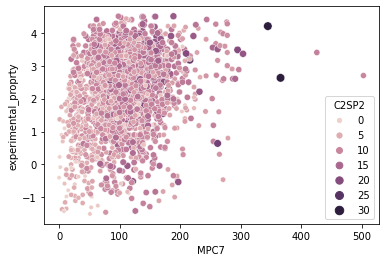

In [9]:
sns.scatterplot(data= df,x='MPC7', y='experimental_proprty', hue='C2SP2', size='C2SP2')

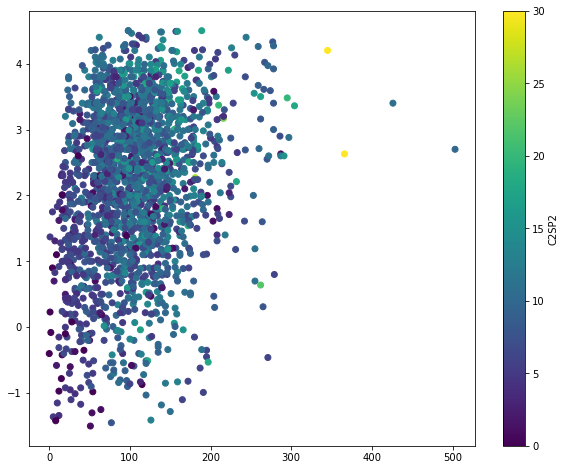

In [37]:
f, ax = plt.subplots(figsize=(10,8))
scatter = plt.scatter(data= df,x='MPC7', y='experimental_proprty', c=df['C2SP2'])
f.colorbar(scatter, label='C2SP2')
plt.show()

In [38]:
df.corr().sort_values("experimental_proprty", ascending=True)

,experimental_proprty,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,nFAHRing,SlogP_VSA6,AATS3d,ATSC6are,nHBDon,SddssS,ATS6m,nAcid,PEOE_VSA8,SsssCH,ATSC5dv,MPC9,MPC4,AATS5v,ZMIC1,C2SP2,ATSC8v,MW2,MIC5,SMR_VSA2,nBondsA,Xp-7d,ATS8Z,nBondsKD,ATS1dv,PEOE_VSA6,LabuteASA,AATS5pe,ATS3pe,n9FaRing,ATS0se,MPC7,AATSC5m,EState_VSA6,SRW04,AATS5i,n5HRing,NaaN,AATS1Z,Sse,ATSC3d,AATS5d,VSA_EState1,IC2,SRW10,Xp-3dv,AATS5Z,ATS7pe,ATSC6pe,Xpc-5dv,bpol,ATSC0d,n10FaHRing,CIC1,ATSC1i,AATSC0dv,ATS4pe,ATS0are,nBondsS,ATSC6Z,ATS0v,ATS2d,ATS8pe,nF,ATS5i,ATS4m,ATS1se,MWC07,EState_VSA2,ATSC4d,ATSC3i,ATSC4p,Xp-6d,piPC5,ATS1are,AATS4m,IC4,NaaNH,WPol,NsCl,ATS0m,ATSC1pe,VSA_EState9,SdNH,AATSC0Z,ATS0pe,AATSC5Z,nBondsKS,SMR_VSA9,ATS3m,nBonds,ATSC8dv,MIF4,VSA_EState4,PEOE_VSA13,Xp-3d,ATS2se,SlogP_VSA10,ATSC6v,ATSC2i,ATS2are,n6aRing,AATS2Z,PEOE_VSA11,MWC03,AATSC3m,nFRing,TIC3,nO,ATSC7pe,ATS4v,AATSC1v,SRW05,EState_VSA8,Xpc-5d,NssssC,Sv,SRW06,ATSC4m,AATSC5dv,C1SP3,ATS8m,ATSC4Z,Sp,SdO,nHRing,ABCGG,NtsC,ATS1m,EState_VSA9,AATSC5v,nH,ATS7m,IC3,ATSC5se,ATS4d,AATSC4m,TIC5,ATS1p,MPC6,SlogP_VSA11,Diameter,GGI1,Xp-0dv,AATS2i,VMcGowan,ATSC3v,AATS0m,ATS1pe,ATS7are,ATS0Z,EState_VSA4,NaaaC,MWC05,n10FHRing,ATSC7p,AATS3Z,ATSC7se,TIC0,CIC2,ATSC0pe,VSA_EState5,SssO,ATS7dv,SaaO,SRW07,ATS5m,ATSC2Z,ATSC4dv,n9FHRing,AATSC4dv,n5aRing,SlogP_VSA1,MIF6,VSA_EState3,Xp-2dv,MIC4,Xp-4dv,fragCpx,TSRW10,GGI2,SRW08,piPC9,NssCH2,SZ,ATS7i,Si,ATSC4are,Zagreb1,ATSC3pe,SsssN,ATS2Z,NssNH,ATS2pe,ATS5v,AATS1m,ZMIC4,ATSC0p,AATS4d,ATS5pe,ATSC5v,PEOE_VSA5,AATS3m,mZagreb2,AATSC1m,n5Ring,ATSC1m,MIC1,ATSC8m,SMR_VSA4,AATSC2Z,n10FaRing,ATSC3Z,SdssC,SlogP_VSA7,EState_VSA1,AATS4i,SRW09,ATSC4i,ATSC1Z,Xpc-6d,AATS3i,ATS3v,VSA_EState8,ATS8se,ATSC2p,EState_VSA3,GGI4,ATSC1dv,ATS3se,ATSC8p,ATS8v,AATSC4v,ATSC6dv,ATSC5Z,SssNH,MWC06,nHeavyAtom,ATS6are,ATS3p,ECIndex,Xp-5d,MWC10,StsC,AATSC1Z,SMR_VSA3,piPC8,FilterItLogS,nBase,ATSC8se,nC,GGI3,TopoPSA(NO),ATSC5pe,NssO,ATS8d,piPC3,nRing,NsNH2,AATS3v,Kier3,ZMIC3,AATSC0m,ATSC8are,SlogP_VSA2,SMR_VSA5,AATS1dv,Xpc-4dv,n5aHRing,NsssN,Kier2,ATS4p,NaaS,AATS4Z,MIF2,ATS6se,ATS1v,MPC2,SMR_VSA7,SaaNH,SaaCH,AATSC3v,ATSC5are,ATS2v,AATSC4Z,ZMIC2,ATS5are,ATS6d,ATS7v,ATSC6i,ATSC2d,SlogP_VSA8,PEOE_VSA1,nN,ATS3d,VSA_EState6,ATSC4v,IC5,SsOH,nHBAcc,AATS4are,piPC6,SsF,MW,ATS4are,ATSC3p,NdO,n5AHRing,BertzCT,AATS1d,nAromBond,TMWC10,ATS8are,n9FaHRing,ATS8dv,Xp-1dv,SdsN,nBridgehead,AATS2d,AATS4v,naRing,ATSC1d,ATS2p,ATSC1v,ATSC0dv,AATSC3dv,NddssS,ATS7Z,ATS6i,TIC4,AATSC3Z,ATS1i,Sm,VAdjMat,ATS7se,AATS0v,nAHRing,SlogP_VSA5,Xc-3dv,AATS3dv,GGI6,ATS2m,ATSC7d,ATSC7dv,NsCH3,n5ARing,ATSC8pe,NsF,BalabanJ,PEOE_VSA2,naHRing,MIF3,ATS4i,ATSC2dv,AATS4dv,nFaRing,SMR,AMW,ATS8i,CIC0,nFaHRing,ABC,AATS2m,ATS6dv,MIC2,ATSC7are,ATS8p,TopoPSA,ATSC5i,Xp-1d,MWC01,Kier1,AATSC0i,ATSC3se,Xp-5dv,Sare,ATSC6m,ZMIC5,AATS1i,nAromAtom,PEOE_VSA3,ATSC0Z,ZMIC0,ATS5Z,Xc-3d,ATS3Z,MIF5,SssCH2,n6aHRing,ATSC0i,MWC08,n10FRing,SaaS,Spe,ATS0dv,Zagreb2,SlogP_VSA3,NdsCH,MWC09,ATSC1p,ATSC6p,ATSC3m,NaasC,ATS4Z,ATS0p,Radius,n6HRing,nARing,PEOE_VSA9,piPC10,ATSC2m,SssssC,NaaCH,C3SP3,EState_VSA7,ATS3dv,MPC3,ATS5p,SLogP,ATSC0se,ATSC7Z,n6AHRing,SaaaC,ATS5d,MIC0,PEOE_VSA7,nRot,StCH,ATSC2v,EState_VSA10,AATS0are,ATSC7m,AATS0i,ATS7p,nBondsD,nFHRing,ATSC1are,SMR_VSA1,TIC1,Xp-4d,nAtom,ATSC3dv,C3SP2,ATS6Z,n6ARing,MPC8,ATSC4se,NsOH,Xpc-4d,SsNH2,ATSC0v,SMR_VSA6,piPC7,Xp-6dv,PEOE_VSA4,ATS6p,apol,ATSC2se,AATSC0v,ATSC3are,StN,ATS1d,ATS2i,ATSC4pe,ATSC5p,ATS2dv,AATS5m,nS,piPC4,ATSC5m,ATS7d,AATS1v,AATS0pe,AATS2dv,VSA_EState2,ATSC0m,ATS3are,ATSC8Z,ATS3i,ATS1Z,ATSC7v,ATSC8i,ATSC5d,PEOE_VSA10,ATSC7i,Xp-2d,AATS0dv,nBondsO,AATS5dv,TIC2,GGI5,AATSC2dv,TMPC10,AATSC2m,MWC04,n9FRing,Xc-5d,ATSC8d,MIC3,VSA_EState7,NdssC,TpiPC10,C1SP2,nBondsM,SaasC,WPath,ATS6pe,ATSC2are,AATS5are,ATS4dv,SlogP_VSA4,SdsCH,MPC10,ATSC6d,ATS5dv,ATS5se,NsssCH,ATSC6se,AATSC2v,PEOE_VSA12,IC1,SaaN,ATS4se,Xpc-6dv,EState_VSA5,ATS0d,AATS0Z,ATSC0are,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring
FilterItLogS,-0.371761,-0.359316,-0.249028,-0.159874,-0.611417,-0.641746,0.008438,-0.216632,-0.196095,0.071034,-0.594

##### Correlation matrix showing which values are most or least correlated to each other, inclusive of target variable "experimental_property"
##### Values closer to -1 have the greatest negative correlation. 
##### Values closer to  1 have the greatest positive correlation.

In [39]:
df.corr().sort_values("experimental_proprty", ascending=True).index[:5]

Index(['FilterItLogS', 'BalabanJ', 'nAcid', 'nHBDon', 'NsOH'], dtype='object')

##### This code returns the top 5 highly correlated columns.

In [40]:
df.corr().applymap(lambda x: abs(x)>0.70)



,experimental_proprty,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,nFAHRing,SlogP_VSA6,AATS3d,ATSC6are,nHBDon,SddssS,ATS6m,nAcid,PEOE_VSA8,SsssCH,ATSC5dv,MPC9,MPC4,AATS5v,ZMIC1,C2SP2,ATSC8v,MW2,MIC5,SMR_VSA2,nBondsA,Xp-7d,ATS8Z,nBondsKD,ATS1dv,PEOE_VSA6,LabuteASA,AATS5pe,ATS3pe,n9FaRing,ATS0se,MPC7,AATSC5m,EState_VSA6,SRW04,AATS5i,n5HRing,NaaN,AATS1Z,Sse,ATSC3d,AATS5d,VSA_EState1,IC2,SRW10,Xp-3dv,AATS5Z,ATS7pe,ATSC6pe,Xpc-5dv,bpol,ATSC0d,n10FaHRing,CIC1,ATSC1i,AATSC0dv,ATS4pe,ATS0are,nBondsS,ATSC6Z,ATS0v,ATS2d,ATS8pe,nF,ATS5i,ATS4m,ATS1se,MWC07,EState_VSA2,ATSC4d,ATSC3i,ATSC4p,Xp-6d,piPC5,ATS1are,AATS4m,IC4,NaaNH,WPol,NsCl,ATS0m,ATSC1pe,VSA_EState9,SdNH,AATSC0Z,ATS0pe,AATSC5Z,nBondsKS,SMR_VSA9,ATS3m,nBonds,ATSC8dv,MIF4,VSA_EState4,PEOE_VSA13,Xp-3d,ATS2se,SlogP_VSA10,ATSC6v,ATSC2i,ATS2are,n6aRing,AATS2Z,PEOE_VSA11,MWC03,AATSC3m,nFRing,TIC3,nO,ATSC7pe,ATS4v,AATSC1v,SRW05,EState_VSA8,Xpc-5d,NssssC,Sv,SRW06,ATSC4m,AATSC5dv,C1SP3,ATS8m,ATSC4Z,Sp,SdO,nHRing,ABCGG,NtsC,ATS1m,EState_VSA9,AATSC5v,nH,ATS7m,IC3,ATSC5se,ATS4d,AATSC4m,TIC5,ATS1p,MPC6,SlogP_VSA11,Diameter,GGI1,Xp-0dv,AATS2i,VMcGowan,ATSC3v,AATS0m,ATS1pe,ATS7are,ATS0Z,EState_VSA4,NaaaC,MWC05,n10FHRing,ATSC7p,AATS3Z,ATSC7se,TIC0,CIC2,ATSC0pe,VSA_EState5,SssO,ATS7dv,SaaO,SRW07,ATS5m,ATSC2Z,ATSC4dv,n9FHRing,AATSC4dv,n5aRing,SlogP_VSA1,MIF6,VSA_EState3,Xp-2dv,MIC4,Xp-4dv,fragCpx,TSRW10,GGI2,SRW08,piPC9,NssCH2,SZ,ATS7i,Si,ATSC4are,Zagreb1,ATSC3pe,SsssN,ATS2Z,NssNH,ATS2pe,ATS5v,AATS1m,ZMIC4,ATSC0p,AATS4d,ATS5pe,ATSC5v,PEOE_VSA5,AATS3m,mZagreb2,AATSC1m,n5Ring,ATSC1m,MIC1,ATSC8m,SMR_VSA4,AATSC2Z,n10FaRing,ATSC3Z,SdssC,SlogP_VSA7,EState_VSA1,AATS4i,SRW09,ATSC4i,ATSC1Z,Xpc-6d,AATS3i,ATS3v,VSA_EState8,ATS8se,ATSC2p,EState_VSA3,GGI4,ATSC1dv,ATS3se,ATSC8p,ATS8v,AATSC4v,ATSC6dv,ATSC5Z,SssNH,MWC06,nHeavyAtom,ATS6are,ATS3p,ECIndex,Xp-5d,MWC10,StsC,AATSC1Z,SMR_VSA3,piPC8,FilterItLogS,nBase,ATSC8se,nC,GGI3,TopoPSA(NO),ATSC5pe,NssO,ATS8d,piPC3,nRing,NsNH2,AATS3v,Kier3,ZMIC3,AATSC0m,ATSC8are,SlogP_VSA2,SMR_VSA5,AATS1dv,Xpc-4dv,n5aHRing,NsssN,Kier2,ATS4p,NaaS,AATS4Z,MIF2,ATS6se,ATS1v,MPC2,SMR_VSA7,SaaNH,SaaCH,AATSC3v,ATSC5are,ATS2v,AATSC4Z,ZMIC2,ATS5are,ATS6d,ATS7v,ATSC6i,ATSC2d,SlogP_VSA8,PEOE_VSA1,nN,ATS3d,VSA_EState6,ATSC4v,IC5,SsOH,nHBAcc,AATS4are,piPC6,SsF,MW,ATS4are,ATSC3p,NdO,n5AHRing,BertzCT,AATS1d,nAromBond,TMWC10,ATS8are,n9FaHRing,ATS8dv,Xp-1dv,SdsN,nBridgehead,AATS2d,AATS4v,naRing,ATSC1d,ATS2p,ATSC1v,ATSC0dv,AATSC3dv,NddssS,ATS7Z,ATS6i,TIC4,AATSC3Z,ATS1i,Sm,VAdjMat,ATS7se,AATS0v,nAHRing,SlogP_VSA5,Xc-3dv,AATS3dv,GGI6,ATS2m,ATSC7d,ATSC7dv,NsCH3,n5ARing,ATSC8pe,NsF,BalabanJ,PEOE_VSA2,naHRing,MIF3,ATS4i,ATSC2dv,AATS4dv,nFaRing,SMR,AMW,ATS8i,CIC0,nFaHRing,ABC,AATS2m,ATS6dv,MIC2,ATSC7are,ATS8p,TopoPSA,ATSC5i,Xp-1d,MWC01,Kier1,AATSC0i,ATSC3se,Xp-5dv,Sare,ATSC6m,ZMIC5,AATS1i,nAromAtom,PEOE_VSA3,ATSC0Z,ZMIC0,ATS5Z,Xc-3d,ATS3Z,MIF5,SssCH2,n6aHRing,ATSC0i,MWC08,n10FRing,SaaS,Spe,ATS0dv,Zagreb2,SlogP_VSA3,NdsCH,MWC09,ATSC1p,ATSC6p,ATSC3m,NaasC,ATS4Z,ATS0p,Radius,n6HRing,nARing,PEOE_VSA9,piPC10,ATSC2m,SssssC,NaaCH,C3SP3,EState_VSA7,ATS3dv,MPC3,ATS5p,SLogP,ATSC0se,ATSC7Z,n6AHRing,SaaaC,ATS5d,MIC0,PEOE_VSA7,nRot,StCH,ATSC2v,EState_VSA10,AATS0are,ATSC7m,AATS0i,ATS7p,nBondsD,nFHRing,ATSC1are,SMR_VSA1,TIC1,Xp-4d,nAtom,ATSC3dv,C3SP2,ATS6Z,n6ARing,MPC8,ATSC4se,NsOH,Xpc-4d,SsNH2,ATSC0v,SMR_VSA6,piPC7,Xp-6dv,PEOE_VSA4,ATS6p,apol,ATSC2se,AATSC0v,ATSC3are,StN,ATS1d,ATS2i,ATSC4pe,ATSC5p,ATS2dv,AATS5m,nS,piPC4,ATSC5m,ATS7d,AATS1v,AATS0pe,AATS2dv,VSA_EState2,ATSC0m,ATS3are,ATSC8Z,ATS3i,ATS1Z,ATSC7v,ATSC8i,ATSC5d,PEOE_VSA10,ATSC7i,Xp-2d,AATS0dv,nBondsO,AATS5dv,TIC2,GGI5,AATSC2dv,TMPC10,AATSC2m,MWC04,n9FRing,Xc-5d,ATSC8d,MIC3,VSA_EState7,NdssC,TpiPC10,C1SP2,nBondsM,SaasC,WPath,ATS6pe,ATSC2are,AATS5are,ATS4dv,SlogP_VSA4,SdsCH,MPC10,ATSC6d,ATS5dv,ATS5se,NsssCH,ATSC6se,AATSC2v,PEOE_VSA12,IC1,SaaN,ATS4se,Xpc-6dv,EState_VSA5,ATS0d,AATS0Z,ATSC0are,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring
experimental_proprty,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

##### Produced a correlation makes that shows True and False as values, represent high correlations. These high correlations include value both negative and positive (values > 70).

In [50]:
df.corr().applymap(lambda x: abs(x)>0.40)

,experimental_proprty,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,nFAHRing,SlogP_VSA6,AATS3d,ATSC6are,nHBDon,SddssS,ATS6m,nAcid,PEOE_VSA8,SsssCH,ATSC5dv,MPC9,MPC4,AATS5v,ZMIC1,C2SP2,ATSC8v,MW2,MIC5,SMR_VSA2,nBondsA,Xp-7d,ATS8Z,nBondsKD,ATS1dv,PEOE_VSA6,LabuteASA,AATS5pe,ATS3pe,n9FaRing,ATS0se,MPC7,AATSC5m,EState_VSA6,SRW04,AATS5i,n5HRing,NaaN,AATS1Z,Sse,ATSC3d,AATS5d,VSA_EState1,IC2,SRW10,Xp-3dv,AATS5Z,ATS7pe,ATSC6pe,Xpc-5dv,bpol,ATSC0d,n10FaHRing,CIC1,ATSC1i,AATSC0dv,ATS4pe,ATS0are,nBondsS,ATSC6Z,ATS0v,ATS2d,ATS8pe,nF,ATS5i,ATS4m,ATS1se,MWC07,EState_VSA2,ATSC4d,ATSC3i,ATSC4p,Xp-6d,piPC5,ATS1are,AATS4m,IC4,NaaNH,WPol,NsCl,ATS0m,ATSC1pe,VSA_EState9,SdNH,AATSC0Z,ATS0pe,AATSC5Z,nBondsKS,SMR_VSA9,ATS3m,nBonds,ATSC8dv,MIF4,VSA_EState4,PEOE_VSA13,Xp-3d,ATS2se,SlogP_VSA10,ATSC6v,ATSC2i,ATS2are,n6aRing,AATS2Z,PEOE_VSA11,MWC03,AATSC3m,nFRing,TIC3,nO,ATSC7pe,ATS4v,AATSC1v,SRW05,EState_VSA8,Xpc-5d,NssssC,Sv,SRW06,ATSC4m,AATSC5dv,C1SP3,ATS8m,ATSC4Z,Sp,SdO,nHRing,ABCGG,NtsC,ATS1m,EState_VSA9,AATSC5v,nH,ATS7m,IC3,ATSC5se,ATS4d,AATSC4m,TIC5,ATS1p,MPC6,SlogP_VSA11,Diameter,GGI1,Xp-0dv,AATS2i,VMcGowan,ATSC3v,AATS0m,ATS1pe,ATS7are,ATS0Z,EState_VSA4,NaaaC,MWC05,n10FHRing,ATSC7p,AATS3Z,ATSC7se,TIC0,CIC2,ATSC0pe,VSA_EState5,SssO,ATS7dv,SaaO,SRW07,ATS5m,ATSC2Z,ATSC4dv,n9FHRing,AATSC4dv,n5aRing,SlogP_VSA1,MIF6,VSA_EState3,Xp-2dv,MIC4,Xp-4dv,fragCpx,TSRW10,GGI2,SRW08,piPC9,NssCH2,SZ,ATS7i,Si,ATSC4are,Zagreb1,ATSC3pe,SsssN,ATS2Z,NssNH,ATS2pe,ATS5v,AATS1m,ZMIC4,ATSC0p,AATS4d,ATS5pe,ATSC5v,PEOE_VSA5,AATS3m,mZagreb2,AATSC1m,n5Ring,ATSC1m,MIC1,ATSC8m,SMR_VSA4,AATSC2Z,n10FaRing,ATSC3Z,SdssC,SlogP_VSA7,EState_VSA1,AATS4i,SRW09,ATSC4i,ATSC1Z,Xpc-6d,AATS3i,ATS3v,VSA_EState8,ATS8se,ATSC2p,EState_VSA3,GGI4,ATSC1dv,ATS3se,ATSC8p,ATS8v,AATSC4v,ATSC6dv,ATSC5Z,SssNH,MWC06,nHeavyAtom,ATS6are,ATS3p,ECIndex,Xp-5d,MWC10,StsC,AATSC1Z,SMR_VSA3,piPC8,FilterItLogS,nBase,ATSC8se,nC,GGI3,TopoPSA(NO),ATSC5pe,NssO,ATS8d,piPC3,nRing,NsNH2,AATS3v,Kier3,ZMIC3,AATSC0m,ATSC8are,SlogP_VSA2,SMR_VSA5,AATS1dv,Xpc-4dv,n5aHRing,NsssN,Kier2,ATS4p,NaaS,AATS4Z,MIF2,ATS6se,ATS1v,MPC2,SMR_VSA7,SaaNH,SaaCH,AATSC3v,ATSC5are,ATS2v,AATSC4Z,ZMIC2,ATS5are,ATS6d,ATS7v,ATSC6i,ATSC2d,SlogP_VSA8,PEOE_VSA1,nN,ATS3d,VSA_EState6,ATSC4v,IC5,SsOH,nHBAcc,AATS4are,piPC6,SsF,MW,ATS4are,ATSC3p,NdO,n5AHRing,BertzCT,AATS1d,nAromBond,TMWC10,ATS8are,n9FaHRing,ATS8dv,Xp-1dv,SdsN,nBridgehead,AATS2d,AATS4v,naRing,ATSC1d,ATS2p,ATSC1v,ATSC0dv,AATSC3dv,NddssS,ATS7Z,ATS6i,TIC4,AATSC3Z,ATS1i,Sm,VAdjMat,ATS7se,AATS0v,nAHRing,SlogP_VSA5,Xc-3dv,AATS3dv,GGI6,ATS2m,ATSC7d,ATSC7dv,NsCH3,n5ARing,ATSC8pe,NsF,BalabanJ,PEOE_VSA2,naHRing,MIF3,ATS4i,ATSC2dv,AATS4dv,nFaRing,SMR,AMW,ATS8i,CIC0,nFaHRing,ABC,AATS2m,ATS6dv,MIC2,ATSC7are,ATS8p,TopoPSA,ATSC5i,Xp-1d,MWC01,Kier1,AATSC0i,ATSC3se,Xp-5dv,Sare,ATSC6m,ZMIC5,AATS1i,nAromAtom,PEOE_VSA3,ATSC0Z,ZMIC0,ATS5Z,Xc-3d,ATS3Z,MIF5,SssCH2,n6aHRing,ATSC0i,MWC08,n10FRing,SaaS,Spe,ATS0dv,Zagreb2,SlogP_VSA3,NdsCH,MWC09,ATSC1p,ATSC6p,ATSC3m,NaasC,ATS4Z,ATS0p,Radius,n6HRing,nARing,PEOE_VSA9,piPC10,ATSC2m,SssssC,NaaCH,C3SP3,EState_VSA7,ATS3dv,MPC3,ATS5p,SLogP,ATSC0se,ATSC7Z,n6AHRing,SaaaC,ATS5d,MIC0,PEOE_VSA7,nRot,StCH,ATSC2v,EState_VSA10,AATS0are,ATSC7m,AATS0i,ATS7p,nBondsD,nFHRing,ATSC1are,SMR_VSA1,TIC1,Xp-4d,nAtom,ATSC3dv,C3SP2,ATS6Z,n6ARing,MPC8,ATSC4se,NsOH,Xpc-4d,SsNH2,ATSC0v,SMR_VSA6,piPC7,Xp-6dv,PEOE_VSA4,ATS6p,apol,ATSC2se,AATSC0v,ATSC3are,StN,ATS1d,ATS2i,ATSC4pe,ATSC5p,ATS2dv,AATS5m,nS,piPC4,ATSC5m,ATS7d,AATS1v,AATS0pe,AATS2dv,VSA_EState2,ATSC0m,ATS3are,ATSC8Z,ATS3i,ATS1Z,ATSC7v,ATSC8i,ATSC5d,PEOE_VSA10,ATSC7i,Xp-2d,AATS0dv,nBondsO,AATS5dv,TIC2,GGI5,AATSC2dv,TMPC10,AATSC2m,MWC04,n9FRing,Xc-5d,ATSC8d,MIC3,VSA_EState7,NdssC,TpiPC10,C1SP2,nBondsM,SaasC,WPath,ATS6pe,ATSC2are,AATS5are,ATS4dv,SlogP_VSA4,SdsCH,MPC10,ATSC6d,ATS5dv,ATS5se,NsssCH,ATSC6se,AATSC2v,PEOE_VSA12,IC1,SaaN,ATS4se,Xpc-6dv,EState_VSA5,ATS0d,AATS0Z,ATSC0are,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring
experimental_proprty,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

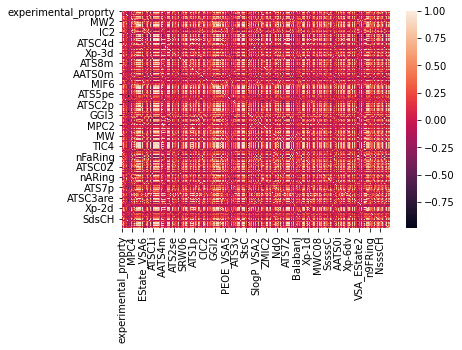

In [47]:
sns.heatmap(data = df.corr())

plt.show()

#### Heatmap of the data correlations
##### The heatmap does not provide as much information or value as the correlation matrices which contain numerical and boolean values.


In [43]:

print("Number of highly correlated variables:", (df.corr().applymap(lambda x: abs(x)>0.9).sum().sum() - df.shape[0])/2)

Number of highly correlated variables: 6301.5


In [48]:
print("Number of highly correlated variables:", (df.corr().applymap(lambda x: abs(x)>0.8).sum().sum() - df.shape[0])/2)

Number of highly correlated variables: 12326.5


##### Divided by 2 to account for duplicates in matrix correlation

In [12]:
x_vals = df['FilterItLogS'].tolist()
y_vals = df['experimental_proprty'].tolist()
z_vals = df['ATS1dv'].tolist()

x = pd.Series(x_vals)
y = pd.Series(y_vals)
z = pd.Series(z_vals)

x.corr(y)


-0.37176113280109974

In [13]:

df2 = df[df.columns[1:]]


In [14]:
#
scaler = StandardScaler()
df_new = scaler.fit_transform(df2)

In [15]:

pca = PCA(0.95)
principalComponents = pca.fit_transform(df_new)
pca.explained_variance_ratio_

array([0.36325454, 0.0922192 , 0.05571791, 0.0378499 , 0.03135725,
       0.02949693, 0.02617534, 0.02158739, 0.02043959, 0.02017927,
       0.01766462, 0.01382741, 0.01376669, 0.01206954, 0.01088829,
       0.01014076, 0.00976797, 0.00904875, 0.00870462, 0.00791311,
       0.00733568, 0.00710691, 0.0069595 , 0.00632871, 0.00601694,
       0.00586414, 0.00570688, 0.00556982, 0.00511282, 0.00486491,
       0.00461041, 0.00435441, 0.00414813, 0.00383981, 0.00372338,
       0.00359544, 0.00347411, 0.00330782, 0.00317225, 0.00302692,
       0.0028524 , 0.00274304, 0.00256523, 0.00248273, 0.00241953,
       0.00234135, 0.00228014, 0.00216597, 0.00213268, 0.00208174,
       0.00196924, 0.00194038, 0.00186084, 0.00184816, 0.00180319,
       0.00179421, 0.00175042, 0.00168006, 0.00166295])

In [16]:
comp_one = principalComponents.T[0]

In [17]:
comp_two = principalComponents.T[1]

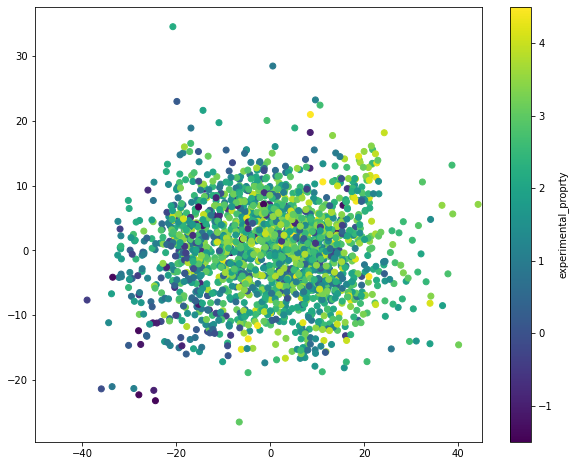

In [34]:
f, ax = plt.subplots(figsize=(10,8))
scatter = plt.scatter(x=comp_one, y=comp_two, c= df["experimental_proprty"] )
f.colorbar(scatter, label="experimental_proprty")
plt.xlim([-50,45])
plt.show()

##### PCA 2D Graph Plot, color coded by target variable "experimental_proprty"

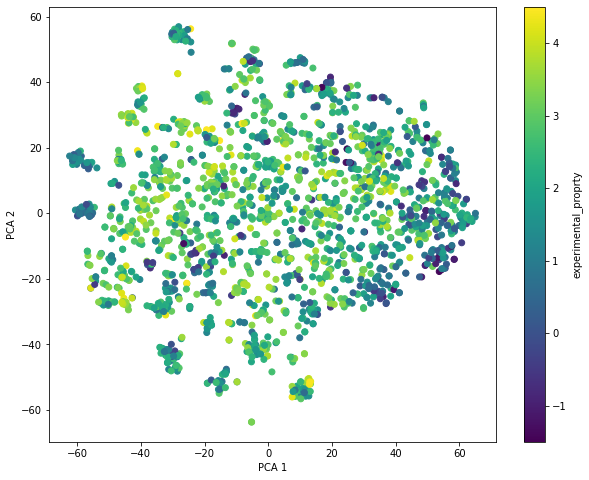

In [30]:
tsne = TSNE(2)
reduced = tsne.fit_transform(df_new)

f, ax = plt.subplots(figsize=(10,8))
scatter2 = plt.scatter(x=reduced.T[0], y=reduced.T[1], c= df["experimental_proprty"] )
f.colorbar(scatter2, label="experimental_proprty")
#plt.xlim(-10,75)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

#### The results achieved from the PCA plot in comparison to the TSNE is less organized and heavily clustered, making it more difficult to assess the data using the PCA 2D graph plot.

### Data Cleaning & Analysis Process

##### 1) Import CSV code
##### 2) Identified columns & rows of dataframe to be cleaned
##### 3) Find data correlations
##### 4) Find target value correlations
##### 5) Computed PCA using Standard Scalar and TSNE on the data

##### Columns which were over populated with 0.0000000 values and which the 0.0000000 values out numbered all other values in that column were removed. These columns were SddssS, SsBr, SaasN and SssS. These columns were safe to remove, because they were mainly populated with 0.0000000 values and would not have any major computational differences.
##### Columns which contained string data instead of numerical data in the form of int or float variable where either removed completely or converted to a numerical categorical format. The column 'MS_enc' was completely removed because there was no way to convert these string values to any other format. The column 'SMIF' contained a few rows with value "Computation failed", which was replaced with 0 values since all other values in this column were numerical. The column that contained missing values was manipulated and filled with the mean value fom the corresponding column, which would help balance out any calculation to be performed.

##### Once the data was cleaned various methods of displaying the variable correlations for the dataset were tested, such as a plotting a heatmap using seaborn, the correlation matrix with values ranging from negative to positive and a True and False correlation matrix filtering out highly correlated variables with absolute values over 70. The highly correlated variables were identified.

##### Standard Scalar PCA and TSNE  where conducted on the dataset, excluding the target variable from the data from. With the Standard Scalar plot, data is scattered and there are no easily identifiable groupings. With the TSNE there are some groupings that can be observed, such as the heavy concentration of blues and smaller groupings/ clusters of blues and greens.